In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset

df = pd.read_csv('AIR_DATA.csv')
del df['StationId']
del df['Datetime']
df.head()

C:\Users\Meena\AppData\Local\Temp\ipykernel_30736\3324577602.py:11: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AIR_DATA.csv')


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [2]:
df=df.dropna()

In [3]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
16,104.00,148.50,1.93,23.00,13.75,9.80,0.10,15.30,117.62,0.30,10.40,0.23,155.0,Moderate
17,94.50,142.00,1.33,16.25,9.75,9.65,0.10,17.00,136.23,0.28,7.10,0.15,159.0,Moderate
18,82.75,126.50,1.47,14.83,9.07,9.70,0.10,15.40,149.92,0.20,4.55,0.08,173.0,Moderate
21,68.50,117.00,1.35,13.60,8.35,7.40,0.10,21.80,161.70,0.10,2.30,0.00,191.0,Moderate
22,69.25,112.25,1.52,11.80,7.55,9.25,0.10,21.38,161.68,0.10,2.35,0.00,191.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2543904,102.80,192.38,44.95,69.05,114.03,40.23,1.06,7.53,16.70,65.42,59.69,1.84,223.0,Poor
2543905,85.50,161.35,16.15,65.22,81.32,39.08,0.79,8.60,20.47,57.14,51.31,1.41,222.0,Poor
2543906,73.75,143.65,8.40,52.65,61.08,38.53,0.66,9.82,26.58,53.71,51.38,1.25,219.0,Poor
2543907,71.50,133.38,5.60,45.03,50.62,42.62,0.55,9.57,28.28,56.80,56.27,1.21,217.0,Poor


In [4]:
x1 =  df.drop(labels=['AQI_Bucket','AQI'], axis=1)
y1 = df.loc[:,'AQI_Bucket']
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['AQI_Bucket'] = label_encoder.fit_transform(df['AQI_Bucket']) 
y1 = label_encoder.fit_transform(df['AQI_Bucket']) 

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter
      (y))



# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

OUR DATASET COUNT         :  Counter({1: 88654, 3: 69531, 0: 22852, 2: 11704, 5: 9147, 4: 1805})
OVER SAMPLING DATA COUNT  :  Counter({1: 88654, 2: 88654, 5: 88654, 3: 88654, 0: 88654, 4: 88654})


In [5]:
X_train #without AQI

array([[-0.60000656, -0.35252849, -0.4706778 , ..., -0.35511863,
        -0.53162815, -0.41223373],
       [ 0.35564141,  0.38106552,  0.22446307, ...,  0.35191401,
        -0.20596299,  0.13911888],
       [-0.56533244, -0.21188403, -0.46331624, ..., -0.20496287,
        -0.50091094, -0.11398048],
       ...,
       [ 0.21868783,  0.17981111, -0.4384973 , ..., -0.28122308,
        -0.15643932, -0.36113855],
       [-0.37985344, -0.65123943, -0.46121294, ..., -0.32556041,
        -0.33792164, -0.39797461],
       [-0.8660249 , -0.91323729, -0.46752284, ..., -0.35511863,
        -0.53068783, -0.41223373]])

In [23]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Define Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Dropout to avoid overfitting
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')  # ✅ Fixed: Classes now defined
])

# Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # ✅ Use classification loss

# Model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 6)                 198       
                                                                 
Total params: 12,198
Trainable params: 12,198
Non-trai

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
13299/13299 [==============================] - 77s 6ms/step - loss: 0.8696 - accuracy: 0.6348 - val_loss: 0.7742 - val_accuracy: 0.6750
Epoch 2/50
13299/13299 [==============================] - 82s 6ms/step - loss: 0.8014 - accuracy: 0.6643 - val_loss: 0.7433 - val_accuracy: 0.6877
Epoch 3/50
13299/13299 [==============================] - 86s 6ms/step - loss: 0.7811 - accuracy: 0.6726 - val_loss: 0.7223 - val_accuracy: 0.6976
Epoch 4/50
13299/13299 [==============================] - 96s 7ms/step - loss: 0.7684 - accuracy: 0.6788 - val_loss: 0.7114 - val_accuracy: 0.7065
Epoch 5/50
13299/13299 [==============================] - 93s 7ms/step - loss: 0.7613 - accuracy: 0.6809 - val_loss: 0.7013 - val_accuracy: 0.7120
Epoch 6/50
13299/13299 [==============================] - 89s 7ms/step - loss: 0.7547 - accuracy: 0.6846 - val_loss: 0.6924 - val_accuracy: 0.7151
Epoch 7/50
13299/13299 [==============================] - 89s 7ms/step - loss: 0.7488 - accuracy: 0.6875 - val_loss: 0

In [25]:
#without AQI
print(f"Test Accuracy: {test_accuracy:4f}")
print(f"Test Loss: {test_loss:4f}")

Test Accuracy: 0.739757
Test Loss: 0.642098


In [26]:
train_loss,train_acc = model.evaluate(X_train, y_train)

13299/13299 [==============================] - 44s 3ms/step - loss: 0.6363 - accuracy: 0.7408


In [27]:
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")

Train Accuracy: 0.7408
Train Loss: 0.6363


3325/3325 [==============================] - 6s 2ms/step


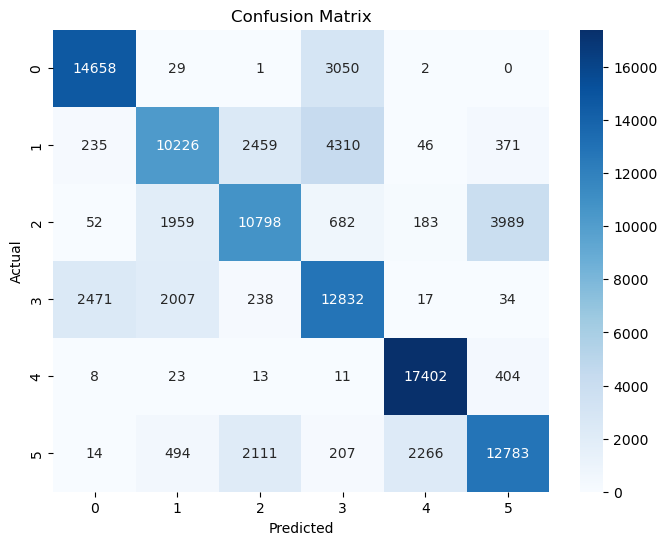

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot it
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
# print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))


In [29]:
# Convert integer labels to strings
target_names = [str(label) for label in label_encoder.classes_]

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=target_names))


              precision    recall  f1-score   support

           0       0.84      0.83      0.83     17740
           1       0.69      0.58      0.63     17647
           2       0.69      0.61      0.65     17663
           3       0.61      0.73      0.66     17599
           4       0.87      0.97      0.92     17861
           5       0.73      0.72      0.72     17875

    accuracy                           0.74    106385
   macro avg       0.74      0.74      0.74    106385
weighted avg       0.74      0.74      0.74    106385



In [30]:
from sklearn.metrics import log_loss

# Compute log loss
log_loss_value = log_loss(y_test, y_pred)  
print(f"Log Loss: {log_loss_value:.4f}")


Log Loss: 0.6421


In [31]:
from sklearn.metrics import hamming_loss

hamming = hamming_loss(y_test, y_pred_classes)
print(f"Hamming Loss: {hamming:.4f}")



Hamming Loss: 0.2602


In [32]:
model.loss

'sparse_categorical_crossentropy'

In [33]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.utils import to_categorical

y_test_bin = to_categorical(y_test, num_classes=6)
y_pred_prob = model.predict(X_test)

auc_score = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
print(f"ROC-AUC Score: {auc_score:.4f}")


3325/3325 [==============================] - 4s 1ms/step
ROC-AUC Score: 0.9508


In [34]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_classes)
print(f"MCC Score: {mcc:.4f}")


MCC Score: 0.6888


In [35]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred_classes)
print(f"Cohen's Kappa Score: {kappa:.4f}")


Cohen's Kappa Score: 0.6877


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define Optimized Neural Network Model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),  
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(len(label_encoder.classes_), activation='softmax')  
])

# Compile Model
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Summary
model.summary()

# Train Model


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1664      
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)  
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [44]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
5818/5818 [==============================] - 56s 9ms/step - loss: 1.0209 - accuracy: 0.5957 - val_loss: 0.8667 - val_accuracy: 0.6608
Epoch 2/100
5818/5818 [==============================] - 65s 11ms/step - loss: 0.9110 - accuracy: 0.6281 - val_loss: 0.8226 - val_accuracy: 0.6688
Epoch 3/100
5818/5818 [==============================] - 67s 11ms/step - loss: 0.8856 - accuracy: 0.6369 - val_loss: 0.8104 - val_accuracy: 0.6725
Epoch 4/100
5818/5818 [==============================] - 66s 11ms/step - loss: 0.8735 - accuracy: 0.6405 - val_loss: 0.8162 - val_accuracy: 0.6671
Epoch 5/100
5818/5818 [==============================] - 67s 11ms/step - loss: 0.8660 - accuracy: 0.6433 - val_loss: 0.8059 - val_accuracy: 0.6721
Epoch 6/100
5818/5818 [==============================] - 66s 11ms/step - loss: 0.8612 - accuracy: 0.6447 - val_loss: 0.7961 - val_accuracy: 0.6767
Epoch 7/100
5818/5818 [==============================] - 64s 11ms/step - loss: 0.8561 - accuracy: 0.6480 - val_loss: 0.

In [45]:
# Evaluate on training data
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Train Loss: {train_loss:.4f}")

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Train Accuracy: 0.6866
Train Loss: 0.7640
Test Accuracy: 0.6866
Test Loss: 0.7658
